# Домашнее задание: Изучение функций активации, функций измерения погрешностей и матричных операций в Python

## Введение

В этом задании мы познакомимся с основными компонентами нейронных сетей: функциями активации, функциями измерения погрешностей и матричными операциями. Вы будете работать с примерами кода и создавать свои собственные на их основе.

---

## Часть 1: Функции активации

### Пример

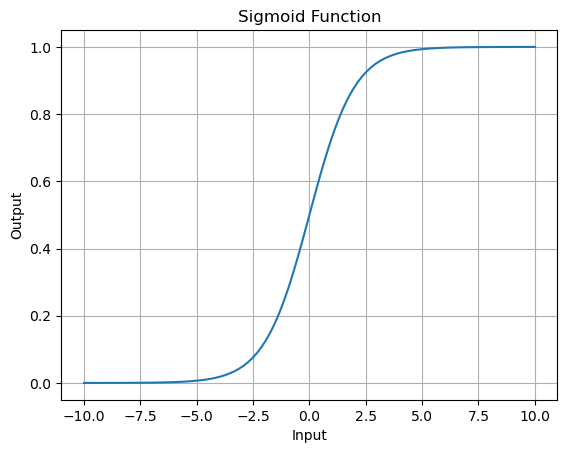

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Генерируем входные данные
x = np.linspace(-10, 10, 100)

# Вычисляем выходные данные
y = sigmoid(x)

# Строим график
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

### Задание

1. **Запустите пример кода** и убедитесь, что график функции Sigmoid отображается корректно.
2. **Реализуйте функцию активации ReLU** по аналогии с примером и постройте её график.
3. **Сделайте выводы**: Как ведут себя функции Sigmoid и ReLU? В чем их основные отличия?

### Решение
1. __График функции Sigmoid отображается корректно (см. выше)__

2. __Реализация функции активации ReLU с построением графика__

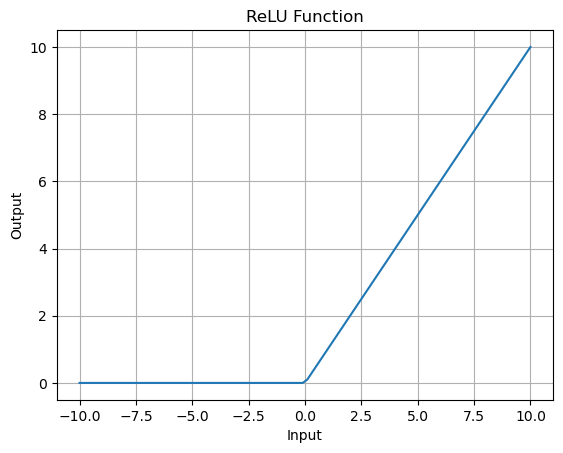

In [168]:
# Импорт библиотек numpy для создания функции активации ReLU
# и matplotlib для построения ее графика
import numpy as np
import matplotlib.pyplot as plt

# Функция активации ReLU
def relu(x):
    return np.maximum(0, x)

# Генерируем входные данные
x = np.linspace(-10, 10, 100)

# Вычисляем выходные данные
y = relu(x)

# Строим график
plt.plot(x, y) # задаем аргументы и значения функции
plt.title('ReLU Function') # вводим название графика
plt.xlabel('Input') # наименвоание оси X
plt.ylabel('Output') # наименование оси Y
plt.grid(True) # отображение сетки
plt.show() # вывод графика

3. __Выводы:__
* Функция сигмоида является экспоненциальной, при приближении значений к максимальным значениям наблюдается затухание градиента, и как следствие, замедляет обучение.
* Функция ReLU центрированf относительно нуля. Однако при отрицательных значениях наблюдается проблема "мертвых№ нейронов.

---

## Часть 2: Функции измерения погрешностей

### Пример

In [171]:
import numpy as np

# Функция потерь MSE
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Истинные значения
y_true = np.array([1, 0, 1, 1, 0])

# Предсказанные значения
y_pred = np.array([0.5, 0.3, 0.9, 0.6, 0.2])

# Вычисляем ошибку
loss = mse_loss(y_true, y_pred)
print(f'MSE Loss: {loss}')

MSE Loss: 0.11000000000000001


### Задание

1. **Запустите пример кода** и посмотрите, какое значение ошибки получается.
2. **Измените предсказанные значения `y_pred`** и снова вычислите ошибку. Как она изменилась?
3. **Реализуйте функцию потерь для кросс-энтропии** по аналогии и вычислите ошибку для тех же значений.

### Решение

1. __При запуске кода получаем следующее значение:__
* со значением y_pred = np.array([0.9, 0.1, 0.8, 0.6, 0.2]) значение MSE Loss равно 0.052000000000000005.

2. __Изменяем значения.__

Приближая значения y_pred к значениям y_true, получаем уменьшение MSE Loss, и наоборот:
* y_pred = np.array([0.9, 0.05, 0.9, 0.8, 0.1]): 0.014499999999999996
* y_pred = np.array([0.5, 0.3, 0.9, 0.6, 0.2]): 0.11000000000000001

3.1 __Реализация функции потерь для кросс-энтропии:__

In [177]:
import numpy as np

# Для реализации функции кросс-энтропии необходимо привести прогнозируемые значения в диапазон от 0 до 1
# Реализуем это с помощью функции softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Устранение переполнения
    return e_x / e_x.sum(axis=0)

# Реализация функции кросс-энтропии
def cross_entropy_loss(y_true, y_pred):
 
    # вычичсляем значения через функцию softmax для прогнозируемых значений
    y_pred = softmax(y_pred)

    # Для подсчета потерь задаем начальное значение, равное 0, т.к. в результате получаем сумму
    loss = 0
     
    # Запускаем вычисление кросс-энтропии в цикле. Количество итераций определятся по количеству значений
    for i in range(len(y_pred)):
 
        # Вычисляем потери для каждого значения и суммируем их по формуле 
        loss = loss + (- y_true[i] * np.log(y_pred[i]))
 
    return loss

# Истинные значения
y_true = np.array([1, 0, 1, 1, 0])

# Предсказанные значения
y_pred = np.array([0.5, 0.3, 0.9, 0.6, 0.2])

# Вычисляем ошибку
loss = cross_entropy_loss(y_true, y_pred)
print(f'Cross entrophy Loss: {loss}')

Cross entrophy Loss: 4.420800105920232


3.2 __Вычисляем кросс-энтропию для значений из пункта 2:__
* y_pred = np.array([0.9, 0.1, 0.8, 0.6, 0.2]): 4.235768220425085
* y_pred = np.array([0.9, 0.05, 0.9, 0.8, 0.1]):4.090426777650819
* y_pred = np.array([0.5, 0.3, 0.9, 0.6, 0.2]): 4.420800105920232

---

## Часть 3: Матричные операции

### Пример

In [180]:
import numpy as np

# Создаем матрицы
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

# Сложение матриц
C = A + B
print('Сложение матриц:\n', C)

# Умножение матриц
D = np.dot(A, B)
print('Умножение матриц:\n', D)

Сложение матриц:
 [[10 10 10]
 [10 10 10]
 [10 10 10]]
Умножение матриц:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


### Задание

1. **Запустите пример кода** и изучите результаты операций.
2. **Создайте свои собственные матрицы размером 2x2** и выполните операции сложения и умножения.
3. **Используйте матричное умножение** для вычисления выходных данных нейронной сети с одним слоем и активацией Sigmoid.

### Решение
1. __При запуске кода получили результаты сложения и умножения матриц.__
2. __Создаем матрицы 2х2 и выполняем их сложение и умножение__

In [183]:
import numpy as np

# Создаем матрицы
E = np.array([[1, 4],
              [3, 2]])

F = np.array([[5, 8],
              [7, 6]])

# Сложение матриц
G = E + F
print('Сложение матриц:\n', G)

# Умножение матриц
H = E @ F
print('Умножение матриц:\n', H)

Сложение матриц:
 [[ 6 12]
 [10  8]]
Умножение матриц:
 [[33 32]
 [29 36]]


3. __Вычисляем выходные данные нейронной сети с одним слоем и активацией Sigmoid__ (типовой шаг обучения без вычисления ошибки, обратного распространения и корректировки весов)

In [185]:
import numpy as np
# функция активации сигмоида
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Генерация обучающих данных
# Входные данные: логическое ИЛИ
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Истинное значение
y = np.array([[0],
              [1],
              [1],
              [1]])

input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Инициализация весов
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

# Вычисление выходных данных

hidden_layer_input = np.dot(X, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
predicted_output = sigmoid(output_layer_input)

print("Выходные данные после обучения:")
print(predicted_output)

Выходные данные после обучения:
[[0.62134175]
 [0.65995894]
 [0.66671363]
 [0.69360531]]


Имеем средние значения для всего слоя, соответственно для оптимизации данных неоходимо реализовать полный алгоритм обучения сети:

In [187]:
import numpy as np
# функция активации сигмоида
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Производная сигмоиды
def sigmoid_derivative(x):
    return x * (1 - x)

# Генерация обучающих данных
# Входные данные: логическое И
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [0],
              [0],
              [1]])

np.random.seed(42) # добавление зерна
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Инициализация весов
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

# Параметры обучения
learning_rate = 0.1
epochs = 10000

# Обучение сети
for epoch in range(epochs):
    # Прямое распространение
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Вычисление ошибки
    error = y - predicted_output

    # Обратное распространение
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Обновление весов
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

print("Выходные данные после обучения:")
print(predicted_output)

Выходные данные после обучения:
[[0.00464867]
 [0.04191428]
 [0.04941492]
 [0.49155017]]


---

## Дополнительные задания (необязательно)

- **Визуализация нескольких функций активации на одном графике** для сравнения.
- **Исследование влияния различных весов** в матричном умножении на выходные данные.

### Решение

1. __Визуализация функций активации Sigmoid,, гиперболического тангенса, ReLU, Swish на одном графике__

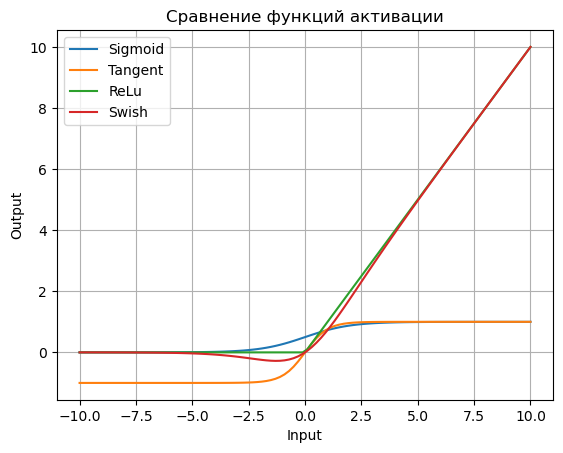

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Функция активации Гиперболический тангенс
def tanh(x):
    return np.tanh(x)

# Функция активации ReLU
def relu(x):
    return np.maximum(0, x)

def swish(x):
    return x * sigmoid(x)

# Генерируем входные данные
x = np.linspace(-10, 10, 100)

# Вычисляем выходные данные
y_sig = sigmoid(x)
y_th = tanh(x)
y_relu = relu(x)
y_sw = swish(x)

# Строим график
plt.plot(x, y_sig, label='Sigmoid')
plt.plot(x, y_th, label='Tangent')
plt.plot(x, y_relu, label='ReLu')
plt.plot(x, y_sw, label='Swish')
plt.title('Сравнение функций активации')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

2. __Исследование влияния различных весов в матричном умножении на выходные данные__
Для исследования возьмем алгоритм обучения сети, и будем выводить среднее значение весов и полученные результаты.
Данные представим графически

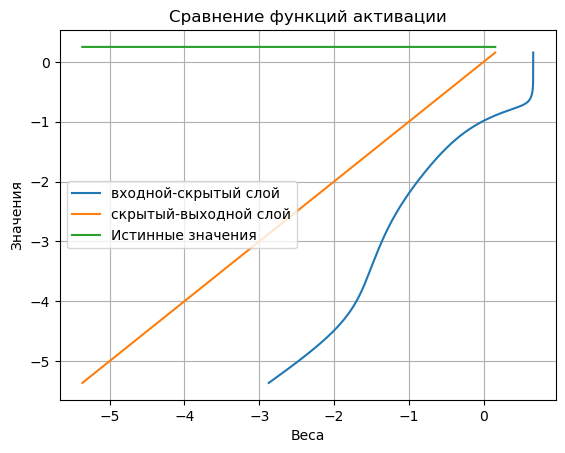

In [193]:
import numpy as np
import matplotlib.pyplot as plt
# функция активации сигмоида
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Производная сигмоиды
def sigmoid_derivative(x):
    return x * (1 - x)

# Генерация обучающих данных
# Входные данные: логическое И
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [0],
              [0],
              [1]])
y_mean = np.mean(y) # среднее значение истинных значений

np.random.seed(42) # добавление зерна
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Инициализация весов
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

# Параметры обучения
learning_rate = 0.1
epochs = 10000

# Массивы (списки) для вывода диаграммы
weights_in_hid = [] # средние значения весов входного-промежуточного слоев
weights_hid_out = [] # средние значения весов промежуточного-выходного слоев
output = [] # средние значения на выходе
true_values = [] # истинные значения (накаждой итерации добавляем одно и то же значение)
# Обучение сети
for epoch in range(epochs):
    # Прямое распространение
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)
    
    # добавляем полученные значения для построения диаграмм
    weights_in_hid.append(np.mean(weights_input_hidden))
    weights_hid_out.append(np.mean(weights_hidden_output))
    output.append(np.mean(weights_hidden_output))
    true_values.append(y_mean)
        
    # Вычисление ошибки
    error = y - predicted_output

    # Обратное распространение
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Обновление весов
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    
    # Строим график
plt.plot(weights_in_hid, output, label='входной-скрытый слой')
plt.plot(weights_hid_out, output, label='скрытый-выходной слой')
plt.plot(weights_hid_out, true_values, label='Истинные значения')
plt.title('Сравнение функций активации')
plt.xlabel('Веса')
plt.ylabel('Значения')
plt.grid(True)
plt.legend()
plt.show()


### Вывод
По мере приближения получаемого значению к истинному среднее значение весов по слоям также растет

---

## Требования к выполнению

- Используйте язык Python и библиотеку NumPy.
- Код должен быть понятным и аккуратно оформленным.
- Добавьте комментарии к своему коду для пояснения выполняемых действий.
- Предоставьте краткие ответы на поставленные вопросы в заданиях.

## Сдача работы

- Отправьте файл с кодом в формате `.py` или Jupyter Notebook `.ipynb`.
- Убедитесь, что ваш код запускается без ошибок.

## Ресурсы для помощи

- Документация NumPy: [https://numpy.org/doc/](https://numpy.org/doc/)
- Учебники по Python для начинающих.

---

Успехов в выполнении задания! Если у вас возникнут вопросы, не стесняйтесь обращаться за помощью.